In [1]:
from Cutout_funct import mk_hst_cutout
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('image', cmap='gist_stern')
matplotlib.rc('image', interpolation='none')

In [2]:
cut = mk_hst_cutout('hst_10886_02_acs_wfc_f814w_j9op02_drc.fits', 
                    (3568, 2226), 
                    (120, 120), 
                    path='../Lens_deblend/Multi-resolution/')

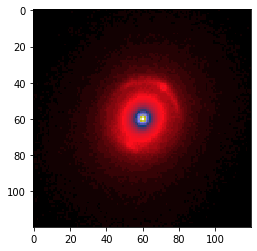

In [3]:
plt.imshow(cut.data)
plt.show()